In [13]:
# Imports
import pandas as pd
import re

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
import requests
import time

import pandas as pd

In [15]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("cats")

'cat'

In [ ]:
https://medium.com/swlh/tweet-sentiment-analysis-using-python-for-complete-beginners-4aeb4456040

## API Calls

We're using the Pushshift API rather than querying or scraping Reddit directly.

In [40]:
url = 'https://api.pushshift.io/reddit/search/submission'

params = {
    'subreddit': 'AskNYC',
    'size': 100,
    'before': 1631370974
}

In [41]:
res = requests.get(url, params=params)

In [42]:
data = res.json()
type(data)

dict

In [39]:
data['data'][-1]['created_utc']

1631370974

## Looping

In [229]:
url = 'https://api.pushshift.io/reddit/search/submission'
subreddit = 'AskNYC'
before = 1632922428

df_list = []

for _ in range(40):
        
    params = {
        'subreddit': subreddit,
        'size': 100,
        'before': before
    }

    res = requests.get(url, params=params)
    data = res.json()
    
    before = data['data'][-1]['created_utc']
    print(f'before updated to: {before}')
    
    post_df = pd.DataFrame(data['data'])
    df_list.append(post_df)
    
    time.sleep(3)

before updated to: 1632801035
before updated to: 1632713881
before updated to: 1632609492
before updated to: 1632513165
before updated to: 1632420108
before updated to: 1632338554
before updated to: 1632251959
before updated to: 1632162799
before updated to: 1632076839
before updated to: 1631935994
before updated to: 1631839850
before updated to: 1631744646
before updated to: 1631657563
before updated to: 1631564141
before updated to: 1631489423
before updated to: 1631386597
before updated to: 1631293600
before updated to: 1631207760
before updated to: 1631119654
before updated to: 1631035738
before updated to: 1630930246
before updated to: 1630799564
before updated to: 1630700273
before updated to: 1630626198
before updated to: 1630553525
before updated to: 1630460117
before updated to: 1630364458
before updated to: 1630281936
before updated to: 1630175896
before updated to: 1630078174
before updated to: 1629985328
before updated to: 1629861660
before updated to: 1629759255
before upd

In [230]:
AskNYC_df = pd.concat(df_list)

In [84]:
url = 'https://api.pushshift.io/reddit/search/submission'
subreddit = 'AskLosAngeles'
before = 1632922428

df_list = []

for _ in range(40):
        
    params = {
        'subreddit': subreddit,
        'size': 100,
        'before': before
    }

    res = requests.get(url, params=params)
    data = res.json()
    
    before = data['data'][-1]['created_utc']
    print(f'before updated to: {before}')
    
    post_df = pd.DataFrame(data['data'])
    df_list.append(post_df)
    
    time.sleep(3)
    
AskLosAngeles_df = pd.concat(df_list)

before updated to: 1632602022
before updated to: 1632328788
before updated to: 1631960486
before updated to: 1631652328
before updated to: 1631331222
before updated to: 1630983454
before updated to: 1630596608
before updated to: 1630307196
before updated to: 1630015984
before updated to: 1629743166
before updated to: 1629417990
before updated to: 1629005530
before updated to: 1628708334
before updated to: 1628450583
before updated to: 1628106375
before updated to: 1627769552
before updated to: 1627439222
before updated to: 1627100871
before updated to: 1626799672
before updated to: 1626458276
before updated to: 1626153959
before updated to: 1625867273
before updated to: 1625550012
before updated to: 1625261517
before updated to: 1624993155
before updated to: 1624593361
before updated to: 1624335115
before updated to: 1623990404
before updated to: 1623704953
before updated to: 1623379247
before updated to: 1623098727
before updated to: 1622726999
before updated to: 1622424026
before upd

In [173]:
NYC_LA_df = pd.concat([AskNYC_df,AskLosAngeles_df])

### Unique users

In [87]:
NYC_LA_df.shape

(7998, 70)

In [88]:
len(NYC_LA_df['author'])

7998

In [89]:
NYC_LA_df['author'].value_counts()

yummsushii              42
yourlocaltransexual     36
dramaturgicaldyad       32
[deleted]               28
sumdum1234              28
                        ..
K1otayler                2
aj752                    2
vietnamese_kid           2
LopsidedCelebration2     2
always___cold            2
Name: author, Length: 2764, dtype: int64

In [91]:
sum(NYC_LA_df['author'].value_counts() > 10)

43

### Status length NYC

In [200]:
status_NYC = AskNYC_df[['selftext','subreddit']].dropna()
status_LA = AskLosAngeles_df[['selftext','subreddit']].dropna()
status_NYC_LA = pd.concat([status_LA,status_NYC])

In [202]:
status_NYC_LA_df=pd.DataFrame(status_NYC_LA)

In [204]:
def get_status_length(status):
    return len(status)

status_NYC_LA_df['status_length'] = status_NYC_LA_df['selftext'].map(get_status_length)

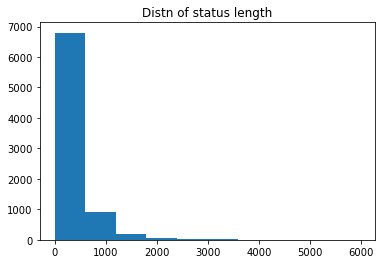

In [205]:
plt.title('Distn of status length')
plt.hist(status_NYC_LA_df['status_length']);

### Status word count

In [206]:
def get_status_word_count(status):
    return len(status.split())

status_NYC_LA_df['status_word_count'] =status_NYC_LA_df['selftext'].map(get_status_word_count)

In [207]:
import matplotlib.pyplot as plt

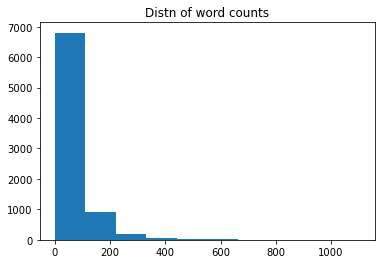

In [208]:
plt.title('Distn of word counts')
plt.hist(status_NYC_LA_df['status_word_count']);

### Average word count

In [258]:
status_NYC_LA_df.groupby('subreddit').mean()[['status_length', 'status_word_count']]

,status_length,status_word_count
subreddit,,
AskLosAngeles,363.476226,67.080330
AskNYC,313.590579,57.767226


### 15 most common words NYC

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [231]:
test=AskNYC_df['selftext'].dropna()

In [232]:
cv = CountVectorizer(stop_words='english')
cv.fit(test)

AskNYC_cv = cv.transform(test)

In [233]:
status_df = pd.DataFrame(AskNYC_cv.todense(), columns=cv.get_feature_names())
status_df.head(3)

,00,000,00am,00nyvirus,00p,00pm,01,010450,010456,02,...,zoned,zoo,zoom,zpass,zucker,zurich,油条,煎饼,肉夹馍,饭团
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
status_df.sum().sort_values(ascending=False).head(16)

just         1040
like          963
know          901
removed       818
nyc           790
ve            760
looking       685
don           657
time          579
new           548
people        514
city          511
good          476
want          475
apartment     474
thanks        459
dtype: int64

<AxesSubplot:>

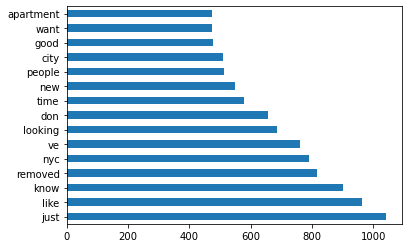

In [124]:
status_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')

### 15 most common words NYC

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [224]:
test=AskLosAngeles_df['selftext'].dropna()

In [225]:
cv = CountVectorizer(stop_words='english')
cv.fit(test)

AskLA_cv = cv.transform(test)

In [226]:
status_df = pd.DataFrame(AskLA_cv.todense(), columns=cv.get_feature_names())
status_df.head(3)

,00,000,0008782,004,004609907,004614454,00am,00pm,01,044406473,...,zones,zoo,zoom,zooming,zoot,zumper,zurich,zyrtec,ángeles,сlearly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
status_df.sum().sort_values(ascending=False).head(15)

la         1802
like       1331
know       1285
just       1164
looking    1118
ve          897
area        784
good        735
people      727
want        713
don         687
thanks      612
time        590
does        578
place       569
dtype: int64

<AxesSubplot:>

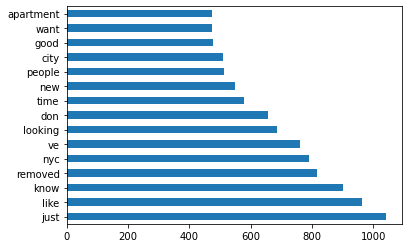

In [129]:
status_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')

### Count of popular words

In [215]:
HappyLA = status_LA[status_LA['selftext'].str.contains("happy")]
len(HappyLA['selftext'])

38

In [216]:
HappyNYC = status_NYC[status_NYC['selftext'].str.contains("happy")]
len(HappyNYC['selftext'])

32

In [217]:
SadLA = status_LA[status_LA['selftext'].str.contains("sad")]
len(SadLA['selftext'])

94

In [218]:
SadNYC = status_NYC[status_NYC['selftext'].str.contains("sad")]
len(SadNYC['selftext'])

22

In [219]:
LoveLA = status_LA[status_LA['selftext'].str.contains("love")]
len(LoveLA['selftext'])

306

In [220]:
LoveNYC = status_NYC[status_NYC['selftext'].str.contains("love")]
len(LoveNYC['selftext'])

189

In [257]:
HateNYC = status_NYC[status_NYC['selftext'].str.contains("hate")]
len(HateNYC['selftext'])

55

In [223]:
HateLA = status_LA[status_LA['selftext'].str.contains("hate")]
len(HateLA['selftext'])

75

In [252]:
RemovedLA = status_LA[status_LA['selftext'].str.contains("removed")]
len(RemovedLA['selftext'])

192

In [253]:
RemovedNYC = status_NYC[status_NYC['selftext'].str.contains("removed")]
len(RemovedNYC['selftext'])

818

In [251]:
status_NYC.shape

(3991, 2)

### Make a dataframe

In [239]:
df=pd.DataFrame({"NYC":[32,22,189,55],
                 "LA":[38,94,306,75]})

In [240]:
df.index = ['Happy', 'Sad', 'Love', 'Hate']
df

,NYC,LA
Happy,32,38
Sad,22,94
Love,189,306
Hate,55,75


### most common bigrams LA

In [130]:
test=AskLosAngeles_df['selftext'].dropna()

In [131]:
bigrams_cv = CountVectorizer(stop_words='english',ngram_range=(2,2), min_df=3)
bigrams_cv.fit(test)

bigrams = bigrams_cv.transform(test)

bigrams_df = pd.DataFrame(bigrams.todense(), columns=bigrams_cv.get_feature_names())

bigrams_df.sum().sort_values(ascending=False).head(15)

los angeles       277
does know         196
santa monica      150
don know          138
thanks advance    125
amp x200b         121
don want          109
moving la         107
https www          80
feel like          73
let know           73
west hollywood     70
west la            66
la area            65
just moved         63
dtype: int64

### most common bigrams NYC

In [134]:
test=AskNYC_df['selftext'].dropna()

In [135]:
bigrams_cv = CountVectorizer(stop_words='english',ngram_range=(2,2), min_df=3)
bigrams_cv.fit(test)

bigrams = bigrams_cv.transform(test)

bigrams_df = pd.DataFrame(bigrams.todense(), columns=bigrams_cv.get_feature_names())

bigrams_df.sum().sort_values(ascending=False).head(15)

new york          184
does know         132
don know          117
don want          101
amp x200b          96
https www          93
thanks advance     82
central park       69
just moved         59
feel like          54
let know           54
years ago          51
just want          46
ve seen            41
imgur com          39
dtype: int64

### Comparison of removed subreddit posts

In [244]:
pd.set_option("display.max_rows", 100)

In [248]:
AskNYC_df['selftext'][0:99]

0     Here’s an odd one, my lease is up tomorrow and...
1     I’m going to Murray Hill queens and public tra...
2                                             [removed]
3     What's good NY,\n\nMy apartment has constructi...
4     Hey, I live in Mount Vernon now and grew up in...
5     Does anyone have any idea when (or if, but I r...
6     Hey guys!\n\nI won the DV lottery this year &a...
7     I'll make it short and sweet, 3 questions (eit...
8                                             [removed]
9     I've been looking for places that I could poss...
10                                            [removed]
11    Hello,\n\nPlease forgive me if I'm posting in ...
12    Any recommendations of stores to buy winter cl...
13    What's the best way to walk around or explore ...
14    I went to a talk at the Brooklyn Museum last w...
15                                            [removed]
16                                            [removed]
17    Any pickleball enthusiasts looking for par

In [247]:
AskLosAngeles_df['selftext'][0:99]

0     What are the best bars in a Thursday night in ...
1     Any cafe or boba shops suggestions that is ope...
2     It's me my mom and my sister, my mom has a cle...
3     Ballot measure? Asking the county themselves t...
4     Do you have a real estate agent that you love?...
5     I moved to LA in December and I honestly think...
6     I’ve been looking to move to the west side or ...
7     I recently started helping at a nonprofit and ...
8     I’ll be going to an event this Friday night at...
9     Anyone know of a professional who will come to...
10    Basically, as the title says. There's a concer...
11    Thinking about moving to LA and found this sup...
12    I am planning a 40th birthday for my partner. ...
13    I am putting together a Halloween event for th...
14    Don’t get me wrong, I can admire a well execut...
15    Big group of people coming in a few weeks, mos...
16    What are *your* top 5 reasons you live in LAWh...
17    do you have any recs? would love to do som

### Sentiment Analysis NYC

In [137]:
sia = SentimentIntensityAnalyzer()

In [149]:
new.shape

(4000, 5)

In [150]:
AskNYC_df.shape

(4000, 69)

In [139]:
string = [str(review) for review in AskNYC_df['selftext']]

In [140]:
sia_list = [sia.polarity_scores(review) for review in string]

In [141]:
sia_list[6]

{'neg': 0.037, 'neu': 0.893, 'pos': 0.07, 'compound': 0.8121}

In [154]:
new = pd.DataFrame.from_dict(sia_list)
new.head(3)

,neg,neu,pos,compound
0,0.076,0.847,0.077,0.6369
1,0.000,0.912,0.088,0.4404
2,0.000,1.000,0.000,0.0000


In [158]:
new.index

RangeIndex(start=0, stop=4000, step=1)

In [159]:
AskNYC_df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', length=4000)

In [146]:
AskNYC_df.head(3)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,removed_by_category,post_hint,preview,author_flair_background_color,author_flair_text_color,edited,banned_by,author_cakeday,link_flair_template_id,link_flair_text
0,[],False,ApartmentQuestion5,None,[],None,text,t2_8q93ft6k,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,dammets,None,[],None,text,t2_p3iwm,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,uncertainness,None,[],None,text,t2_3tlw4,False,False,...,reddit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
test = AskNYC_df.reset_index(drop=True)

In [161]:
NYC_result = pd.concat([test, new], axis=1, join='inner')

In [162]:
NYC_result['comp_score'] = NYC_result['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [164]:
NYC_result['comp_score'].value_counts(normalize=True)

pos    0.853
neg    0.147
Name: comp_score, dtype: float64

### Sentiment Analysis LA

In [137]:
sia = SentimentIntensityAnalyzer()

In [149]:
new.shape

(4000, 5)

In [150]:
AskLosAngeles_df.shape

(4000, 69)

In [165]:
string = [str(review) for review in AskLosAngeles_df['selftext']]

In [166]:
sia_list = [sia.polarity_scores(review) for review in string]

In [141]:
sia_list[6]

{'neg': 0.037, 'neu': 0.893, 'pos': 0.07, 'compound': 0.8121}

In [167]:
new = pd.DataFrame.from_dict(sia_list)
new.head(3)

,neg,neu,pos,compound
0,0.0,0.816,0.184,0.9521
1,0.0,0.793,0.207,0.7184
2,0.0,0.958,0.042,0.2144


In [168]:
test = AskLosAngeles_df.reset_index(drop=True)

In [169]:
LA_result = pd.concat([test, new], axis=1, join='inner')

In [170]:
LA_result['comp_score'] = LA_result['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [171]:
LA_result['comp_score'].value_counts(normalize=True)

pos    0.84071
neg    0.15929
Name: comp_score, dtype: float64